## Funciones

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.metrics.pairwise import cosine_similarity

# Mostrar imágenes originales
def show_original_images(images):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(4, 5, i+1)
        plt.imshow(imread(images[i]), cmap='gray')
        plt.axis('off')
    plt.suptitle('Original images')
    plt.show()
    return

# Procesamiento de imágenes como una única matriz
def images_as_matrix(images):
    images_data = []
    for img in images:
        image_as_vector = imread(img)
        images_data.append(image_as_vector.flatten())

    return np.array(images_data)

# Descomposición SVD
def svd_decomposition(images):
    return np.linalg.svd(images, full_matrices=False)

# Visualización de compresión
def visualization(approximation, d):
    plt.figure(figsize=(10, 5))
    for i in range(len(approximation)):
        plt.subplot(4, 5, i+1)
        plt.imshow(approximation[i].reshape((28, 28)), cmap='gray')
        plt.axis('off')
    plt.suptitle('Compression = ' + str(d))
    plt.show()
    return

# Compresión de imágenes y visualización
def compression_and_visualization(U, S, Vt, values):
    for d in values:
        U_d = U[:, :d]
        S_d = np.diag(S[:d])
        Vt_d = Vt[:d, :]

        image_approximation = U_d @ S_d @ Vt_d

        visualization(image_approximation, d)

    return image_approximation

# Valores singulares y suma acumulada
def singular_values_and_cumulative_sum(S):  
    # Singular values  
    plt.figure(1)
    plt.semilogy(np.diag(np.diag(S)))
    plt.title('Singular values')
    plt.show()

    # Cumulative sum of singular values
    plt.figure(2)
    plt.plot(np.cumsum(np.diag(np.diag(S)))/np.sum(np.diag(np.diag(S))))
    plt.title('Cumulative sum of singular values')
    plt.show()
    return

# Matriz de similaridad
def similarity_matrix_construction(U, S, Vt, values):
    for d in values:
        U_hat = U[:, :d]
        S_hat = np.diag(S[:d])
        Vt_hat = Vt[:d, :]

        image_approximation = U_hat @ S_hat @ Vt_hat
        similarity_matrix = cosine_similarity(image_approximation)

        plt.figure(figsize=(10, 8))
        plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.xticks(np.arange(similarity_matrix.shape[1]))
        plt.yticks(np.arange(similarity_matrix.shape[0]))
        plt.title(f'Similarity Matrix for d = {d}')
        plt.show()
    return

# Norma de Frobenius
def frobenius_norm(matrix):
    return np.linalg.norm(matrix, 'fro')

# Compresión de imágenes y cálculo de error
def compression_and_error(U, S, Vt, original_matrix):
    for d in range(1, 8):
        U_d = U[:, :d]
        S_d = np.diag(S[:d])
        Vt_d = Vt[:d, :]
        
        image_approximation = U_d @ S_d @ Vt_d

        frobenius_relative_error = frobenius_norm(original_matrix - image_approximation) / frobenius_norm(original_matrix)  # Error relativo

        print(f'Error relativo para dimensión {d}: {frobenius_relative_error * 100:.2f}%')
        if frobenius_relative_error < 0.1:
            print(f'El número mínimo de dimensiones que genera menos de 10% de error en la reducción es {d}')
            print(f'Error: {frobenius_relative_error * 100:.2f}%')
            return d

        elif d == 7:
            print(f'No se encontró un número de dimensiones que genere menos de 10% de error en la reducción. La mejor reducción que se puede realizar es a dimensión {d} con un error del {frobenius_relative_error * 100:.2f}%')
            return d

# Reconstrucción de imágenes del dataset 1 con la dimesión óptima
def optimal_dimension_reconstruction(U, S, Vt, d, original_matrix):
    U_d = U[:, :d]
    S_d = np.diag(S[:d])
    Vt_d = Vt[:d, :]

    image_approximation = U_d @ S_d @ Vt_d

    visualization(image_approximation, d)

    frobenius_relative_error = frobenius_norm(original_matrix - image_approximation) / frobenius_norm(original_matrix)  # Error relativo
    print(f'El error relativo para dimensión {d} en el dataset 1 es del {frobenius_relative_error * 100:.2f}%')

    return image_approximation

## Main

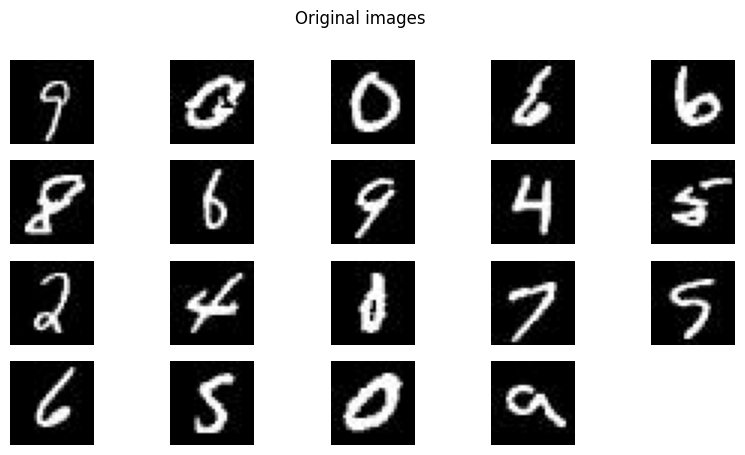

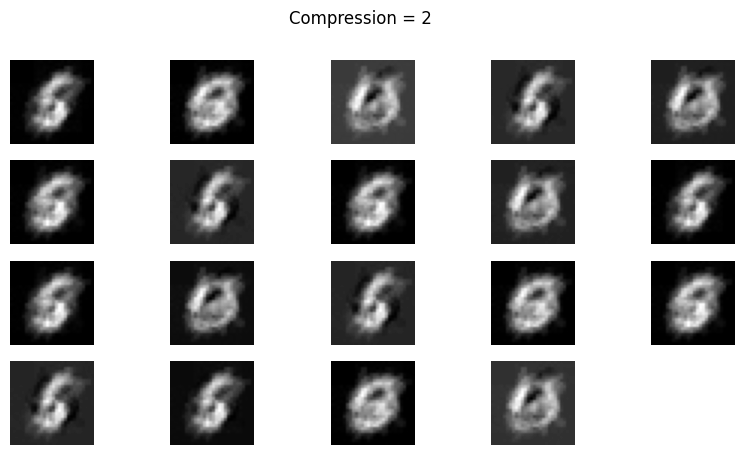

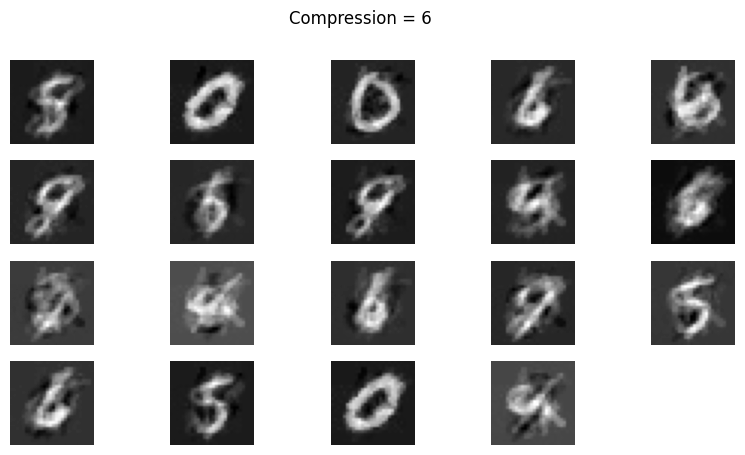

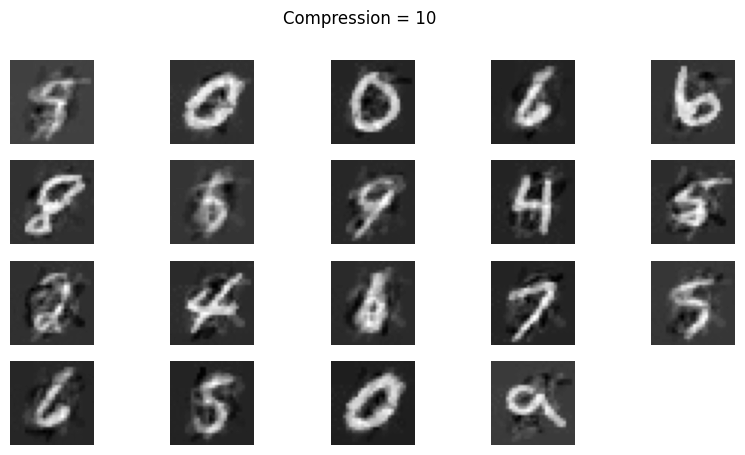

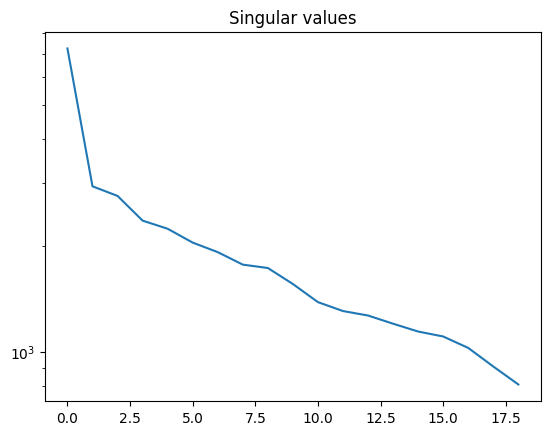

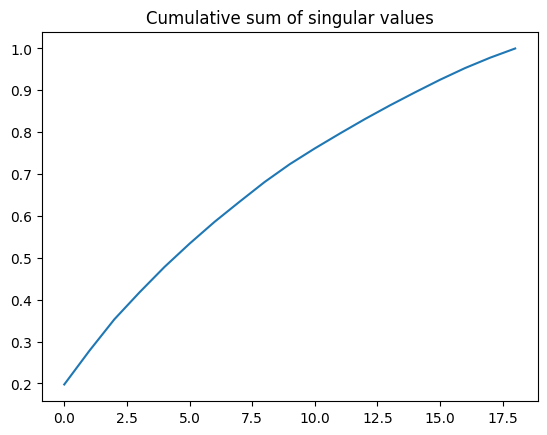

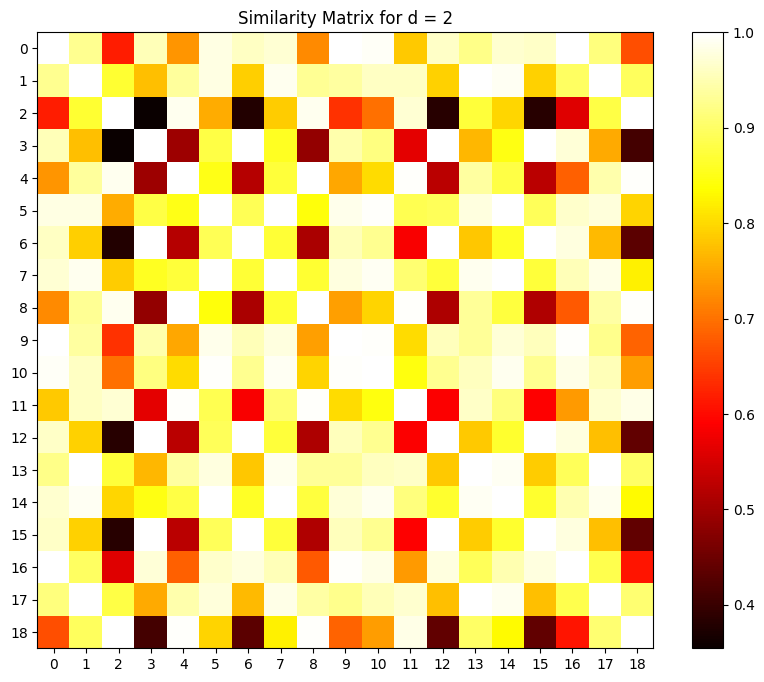

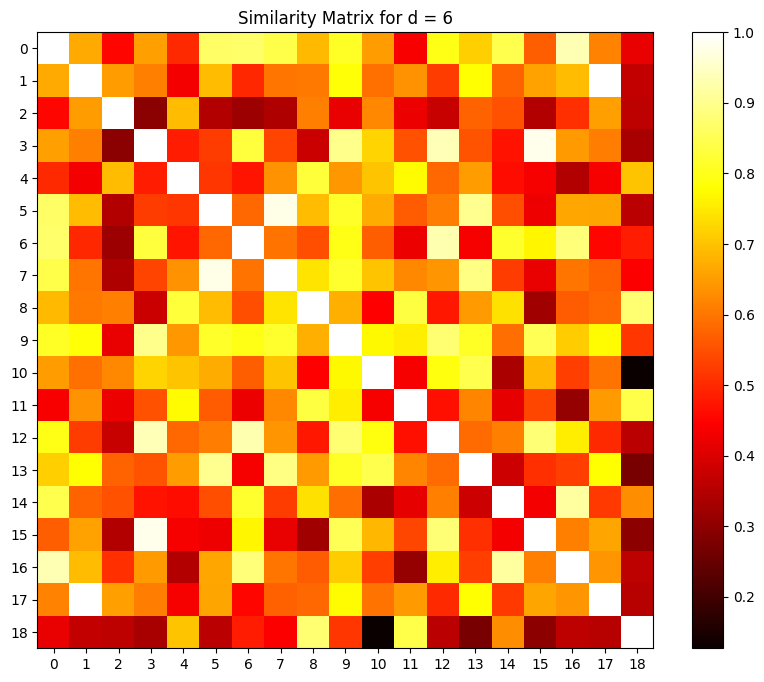

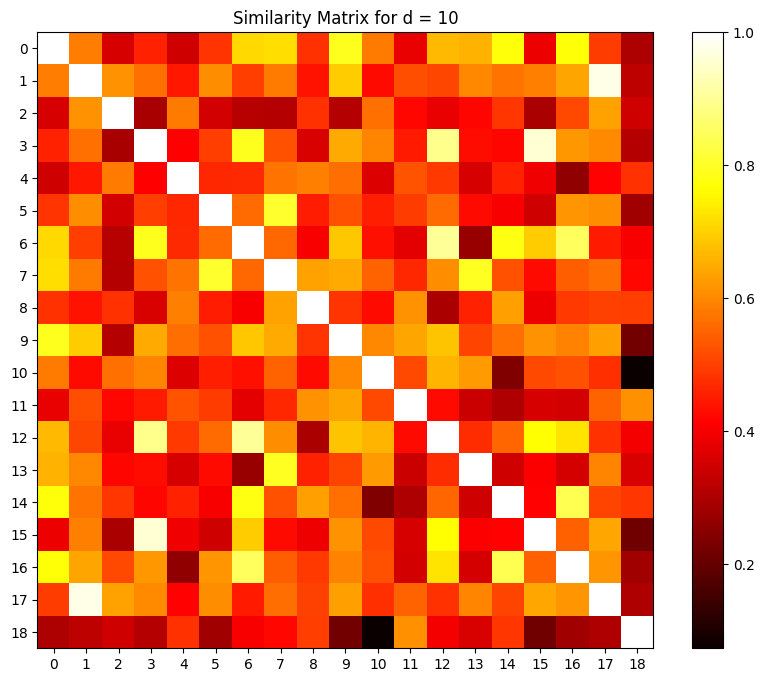

Error relativo para dimensión 1: 63.14%
Error relativo para dimensión 2: 53.51%
Error relativo para dimensión 3: 46.35%
Error relativo para dimensión 4: 39.24%
Error relativo para dimensión 5: 31.32%
Error relativo para dimensión 6: 23.03%
Error relativo para dimensión 7: 12.83%
No se encontró un número de dimensiones que genere menos de 10% de error en la reducción. La mejor reducción que se puede realizar es a dimensión 7 con un error del 12.83%


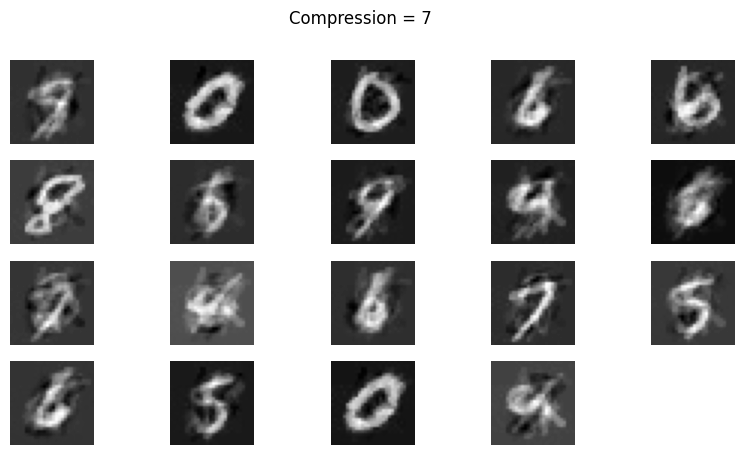

El error relativo para dimensión 7 en el dataset 1 es del 43.41%


In [7]:
def main():
    # Imágenes dataset 1
    images_dataset_1 = ['datasets_imgs/img00.jpeg', 'datasets_imgs/img01.jpeg', 'datasets_imgs/img02.jpeg', 'datasets_imgs/img03.jpeg', 
                        'datasets_imgs/img04.jpeg', 'datasets_imgs/img05.jpeg', 'datasets_imgs/img06.jpeg', 'datasets_imgs/img07.jpeg', 
                        'datasets_imgs/img08.jpeg', 'datasets_imgs/img09.jpeg', 'datasets_imgs/img10.jpeg', 'datasets_imgs/img11.jpeg', 
                        'datasets_imgs/img12.jpeg', 'datasets_imgs/img13.jpeg', 'datasets_imgs/img14.jpeg', 'datasets_imgs/img15.jpeg', 
                        'datasets_imgs/img16.jpeg', 'datasets_imgs/img17.jpeg', 'datasets_imgs/img18.jpeg']
    
    # Valores de compresión
    compression_values = [2, 6, 10]

    # Mostrar imágenes originales
    show_original_images(images_dataset_1)

    # Descomposición SVD
    images_data1 = images_as_matrix(images_dataset_1)
    U, S, Vt = svd_decomposition(images_data1)

    # Compresión y visualización
    compression_and_visualization(U, S, Vt, compression_values)

    # Valores singulares y suma acumulada
    singular_values_and_cumulative_sum(S)

    # Matriz de similaridad
    similarity_matrix_construction(U, S, Vt, compression_values)

    # 2.4
    # Imágenes dataset 2
    images_dataset_2 = ['datasets_imgs_02/img00.jpeg', 'datasets_imgs_02/img01.jpeg', 'datasets_imgs_02/img02.jpeg', 'datasets_imgs_02/img03.jpeg', 
                        'datasets_imgs_02/img04.jpeg', 'datasets_imgs_02/img05.jpeg', 'datasets_imgs_02/img06.jpeg', 'datasets_imgs_02/img07.jpeg']

    # Descomposición SVD
    images_data2 = images_as_matrix(images_dataset_2)
    U2, S2, Vt2 = svd_decomposition(images_data2)

    # Cálculo de dimensión óptima a tarvés de la compresión de imágenes y cálculo de error
    optimal_dimension = compression_and_error(U2, S2, Vt2, images_data2)

    # Reconstrucción de imágenes del dataset 1 con la dimensión óptima
    optimal_dimension_reconstruction(U, S, Vt, optimal_dimension, images_data1)


if __name__ == '__main__':
    main()